In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [6]:
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [9]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [10]:
features_df = pd.read_csv('features.csv')

In [11]:
stores_df = pd.read_csv('stores.csv')

In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [13]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

In [14]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [15]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


In [16]:
#Merge train_df and features_df
train_new = pd.merge(train_df,features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [17]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

In [18]:
train_new = pd.merge(train_new, stores_df, on='Store', how='left')

In [19]:
train_new

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
5           1     1 2010-03-12      21043.39      False        57.79   
6           1     1 2010-03-19      22136.64      False        54.58   
7           1     1 2010-03-26      26229.21      False        51.45   
8           1     1 2010-04-02      57258.43      False        62.27   
9           1     1 2010-04-09      42960.91      False        65.86   
10          1     1 2010-04-16      17596.96      False        66.32   
11          1     1 2010-04-23      16145.35      False        64.84   
12          1     1 2010-04-30      16555.11      False        67.41   
13          1     1 2010-05-07      17413.94      False        72.55   
14          1     1 2010-05-14      18926.74      False        74.78   
15          1     1 2010-05-21      14773.04      False        76.44   
16          1     1 2010-05-28      15580.43      False        80.44   
17          1     1 2010-06-04      17558.09      False        80.69   
18          1     1 2010-06-11      16637.62      False        80.43   
19          1     1 2010-06-18      16216.27      False        84.11   
20          1     1 2010-06-25      16328.72      False        84.34   
21          1     1 2010-07-02      16333.14      False        80.91   
22          1     1 2010-07-09      17688.76      False        80.48   
23          1     1 2010-07-16      17150.84      False        83.15   
24          1     1 2010-07-23      15360.45      False        83.36   
25          1     1 2010-07-30      15381.82      False        81.84   
26          1     1 2010-08-06      17508.41      False        87.16   
27          1     1 2010-08-13      15536.40      False        87.00   
28          1     1 2010-08-20      15740.13      False        86.65   
29          1     1 2010-08-27      15793.87      False        85.22   
...       ...   ...        ...           ...        ...          ...   
421540     45    98 2012-04-06        778.70      False        49.73   
421541     45    98 2012-04-13        559.14      False        51.83   
421542     45    98 2012-04-20        605.80      False        63.13   
421543     45    98 2012-04-27        619.41      False        53.20   
421544     45    98 2012-05-04        694.25      False        55.21   
421545     45    98 2012-05-11        893.60      False        61.24   
421546     45    98 2012-05-18        745.44      False        66.30   
421547     45    98 2012-05-25        795.94      False        67.21   
421548     45    98 2012-06-01        874.64      False        74.48   
421549     45    98 2012-06-08        713.50      False        64.30   
421550     45    98 2012-06-15        856.35      False        71.93   
421551     45    98 2012-06-22        622.62      False        74.22   
421552     45    98 2012-06-29        690.52      False        75.22   
421553     45    98 2012-07-06        659.65      False        82.99   
421554     45    98 2012-07-13        695.21      False        79.97   
421555     45    98 2012-07-20        845.30      False        78.89   
421556     45    98 2012-07-27        657.63      False        77.20   
421557     45    98 2012-08-03        516.46      False        76.58   
421558     45    98 2012-08-10        727.49      False        78.65   
421559     45    98 2012-08-17        500.16      False        75.71   
421560     45    98 2012-08-24        415.40      False        72.62   
421561     45    98 2012-08-31        346.04      False        75.09   
421562     45    98 2012-09-07        352.44       True        75.70   
421563     45    98 2012-09-14        605.96    

In [20]:
year = train_new['Date'].dt.year

In [21]:
month = train_new['Date'].dt.month

In [22]:
str_sales = train_new.groupby(['Store', year])[['Weekly_Sales']].sum()


In [23]:
str_sales.shape

(135, 1)

In [24]:
str_sales['Weekly_Sales']=np.log(str_sales['Weekly_Sales'])


In [25]:
str_sales.head()

Weekly_Sales
Store Date              
1     2010     18.109782
      2011     18.208995
      2012     18.037985
2     2010     18.372308
      2011     18.406662

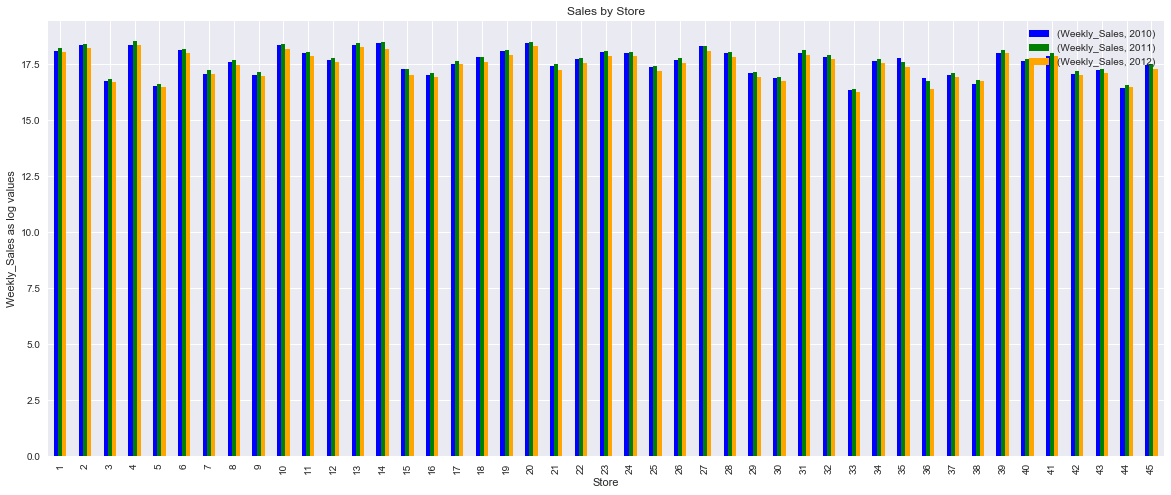

In [26]:
str_sales.unstack(level=1).plot(kind='bar',figsize=(20,8),color=['blue','green','orange'])

plt.xlabel('Store')
plt.ylabel('Weekly_Sales as log values')
plt.title('Sales by Store')
plt.legend(loc=0)

#### Observation: 
### 1) Sales in 2011 is found to be better compared to 2010 and 2012.
### 2) Stores 2, 13, 14, 20, 39 seem to be having more sales than other stores

In [27]:
str_sales_hol = train_new.groupby(['Store', year, 'IsHoliday'])[['Weekly_Sales']].sum()

In [28]:
str_sales_hol.head()


Weekly_Sales
Store Date IsHoliday              
1     2010 False       66806469.75
           True         6472362.25
      2011 False       74201049.28
           True         6720869.55
      2012 False       64737813.26

In [29]:
str_sales_hol['Weekly_Sales']=np.log(str_sales_hol['Weekly_Sales'])

In [30]:
str_sales_hol.head()

Weekly_Sales
Store Date IsHoliday              
1     2010 False         18.017310
           True          15.683052
      2011 False         18.122289
           True          15.720728
      2012 False         17.985856

In [31]:
str_sales_hol.unstack(level=1).unstack(level=1).head()

Weekly_Sales                                                       
Date              2010                  2011                  2012           
IsHoliday        False      True       False      True       False      True 
Store                                                                        
1            18.017310  15.683052  18.122289  15.720728  17.985856  15.058005
2            18.280174  15.942086  18.317578  15.944274  18.165719  15.202330
3            16.650145  14.358553  16.762133  14.389510  16.657096  13.689405
4            18.281901  15.971736  18.438516  16.044750  18.295927  15.319536
5            16.413086  14.155478  16.522266  14.214438  16.415898  13.458677

(0, 25)

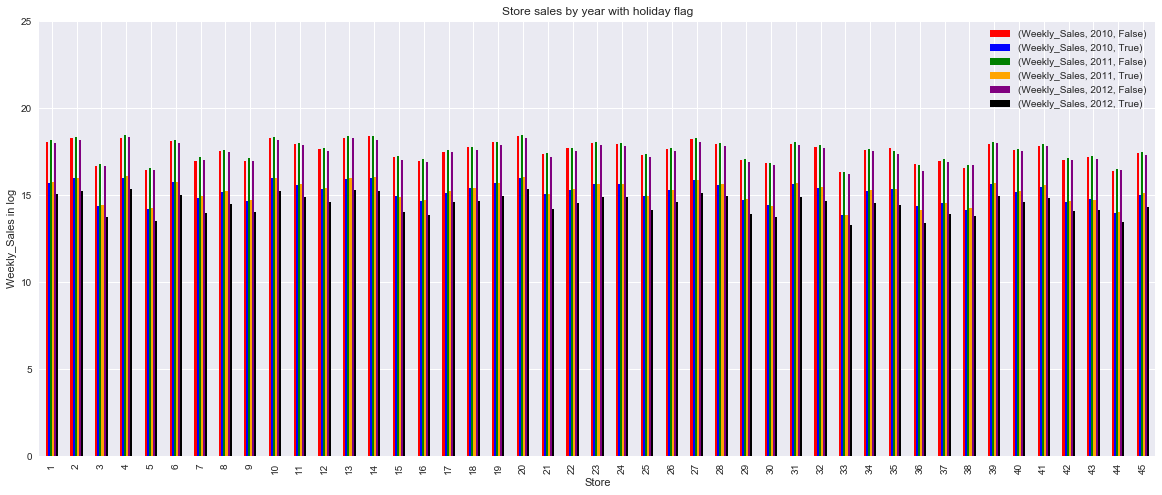

In [32]:
str_sales_hol.unstack(level=1).unstack(level=1).plot(kind='bar',figsize=(20,8),color=['red','blue','green','orange','purple','black'])
plt.ylabel('Weekly_Sales in log')
plt.title('Store sales by year with holiday flag')
plt.legend(loc=0)
plt.ylim(0,25)

#### Observation:
#### 1) Sales is seen to be high during holidays, for all 3 years in observation


In [33]:
train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [34]:
#Group by store 1
str_sales_month = train_new.groupby(['Store', month])[['Weekly_Sales']].sum()

In [35]:
str_sales_month.head()

Weekly_Sales
Store Date              
1     1      11203741.49
      2      19505306.58
      3      20380666.86
      4      21623140.34
      5      18505332.90

In [36]:
#Different ways to slice the multi index:

#str_sales.loc[([1,10], [2010,2012]),:]

In [37]:
#str_sales_month.loc[(slice(1), slice(1,12)),:]

In [38]:
#train_df.loc[0:5,'Weekly_Sales']

In [39]:
#str_sales.loc[(slice(1),slice(2010)),'Weekly_Sales']

In [40]:
#train_new.loc[((train_new['Store'])==1) ]#['Weekly_Sales'] 
#(train_new['Weekly_Sales'].loc[(train_new['Date'].dt.year) == 2010])

#plt.hist(np.log(train_new[(train_new['Store']==1) & (train_new['Date'].dt.year == 2010) ]['Weekly_Sales'].sum()))

In [41]:
#Aggregate the data from the last year of the training set by store-department-month-IsHoliday, 
#taking the median as the aggregation function. 
#For each entry in the test set, predict the matching row from that table, or predict 0 if there isn't one

In [42]:
#train_new.groupby(['Store','Dept',month,'IsHoliday'])[['Weekly_Sales']].median()

In [43]:
#str_sales.loc[(slice(1,5),slice(2010)),'Weekly_Sales']

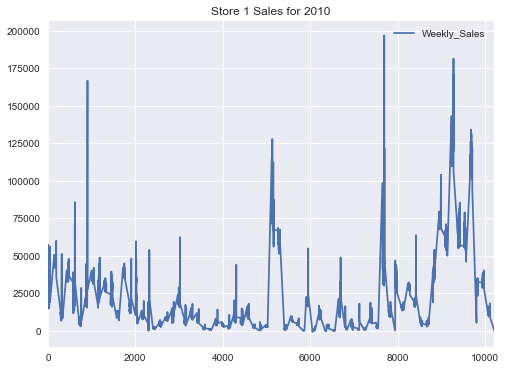

In [44]:
train_new[(train_new['Store']==1) & (train_new['Date'].dt.year == 2010)][['Weekly_Sales']].plot(figsize=(8,6),title='Store 1 Sales for 2010')

In [45]:
train_new[(train_new['Store']==1) & (train_new['Date'].dt.year == 2010)][['Weekly_Sales']].max()

Weekly_Sales    196810.42
dtype: float64

In [46]:
train_new['Year']=train_new['Date'].dt.year

In [47]:
train_new['Month']=train_new['Date'].dt.month

In [48]:
train_new.head() #Year and month added to df

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  Year  Month  
0         8.106    A  151315  2010      2  
1         8.106    A  151315  2010      2  
2         8.106    A  151315  2010      2  
3         8.106    A  151315  2010      2  
4         8.106    A  151315  2010      3

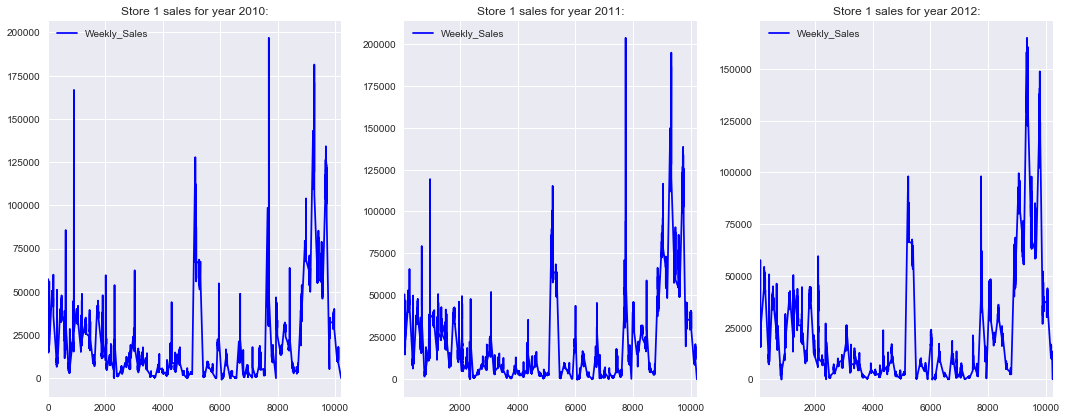

In [49]:
## Sales of Store 1 for 3 years
fig, ax = plt.subplots(1,3)
yr=2010
for c in range(0,3):
    train_new[(train_new['Store']==1) & (train_new['Year'] == yr)][['Weekly_Sales']].plot(color='blue',ax=ax[c],figsize=(15,6),title='Store 1 sales for year %d:'% yr)    
    yr += 1
plt.tight_layout()        

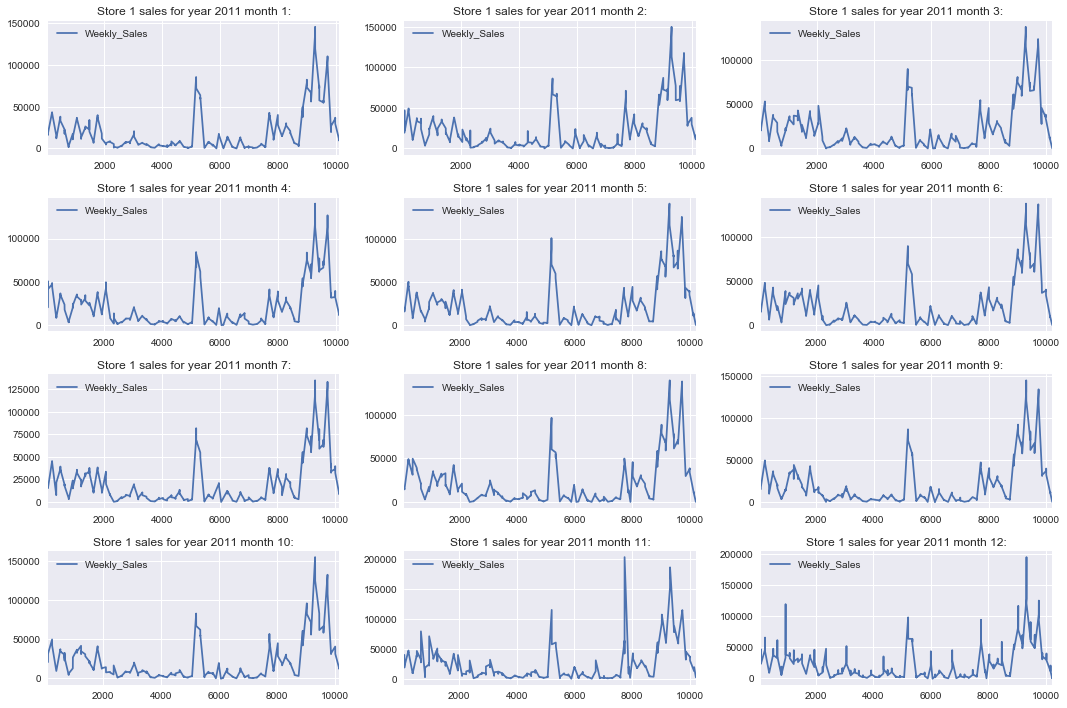

In [50]:
#Sales for Store 1 for 2011 - monthwise:
fig, ax = plt.subplots(4,3)
yr = 2011
mon = 1
for r in range(0,4):
    for c in range(0,3):
        train_new[(train_new['Store']==1) & (train_new['Year']== yr) & (train_new['Month']== mon)][['Weekly_Sales']].plot(ax=ax[r,c],figsize=(15,10),title='Store 1 sales for year %d month %d:'% (yr, mon))
#        yr += 1                                                                                                                  
        mon += 1
                                                                                                                          
                                                                                                                          
plt.tight_layout()        

In [51]:
#sns.lmplot('Store','Weekly_Sales',train_new,col='Year',row='Month')

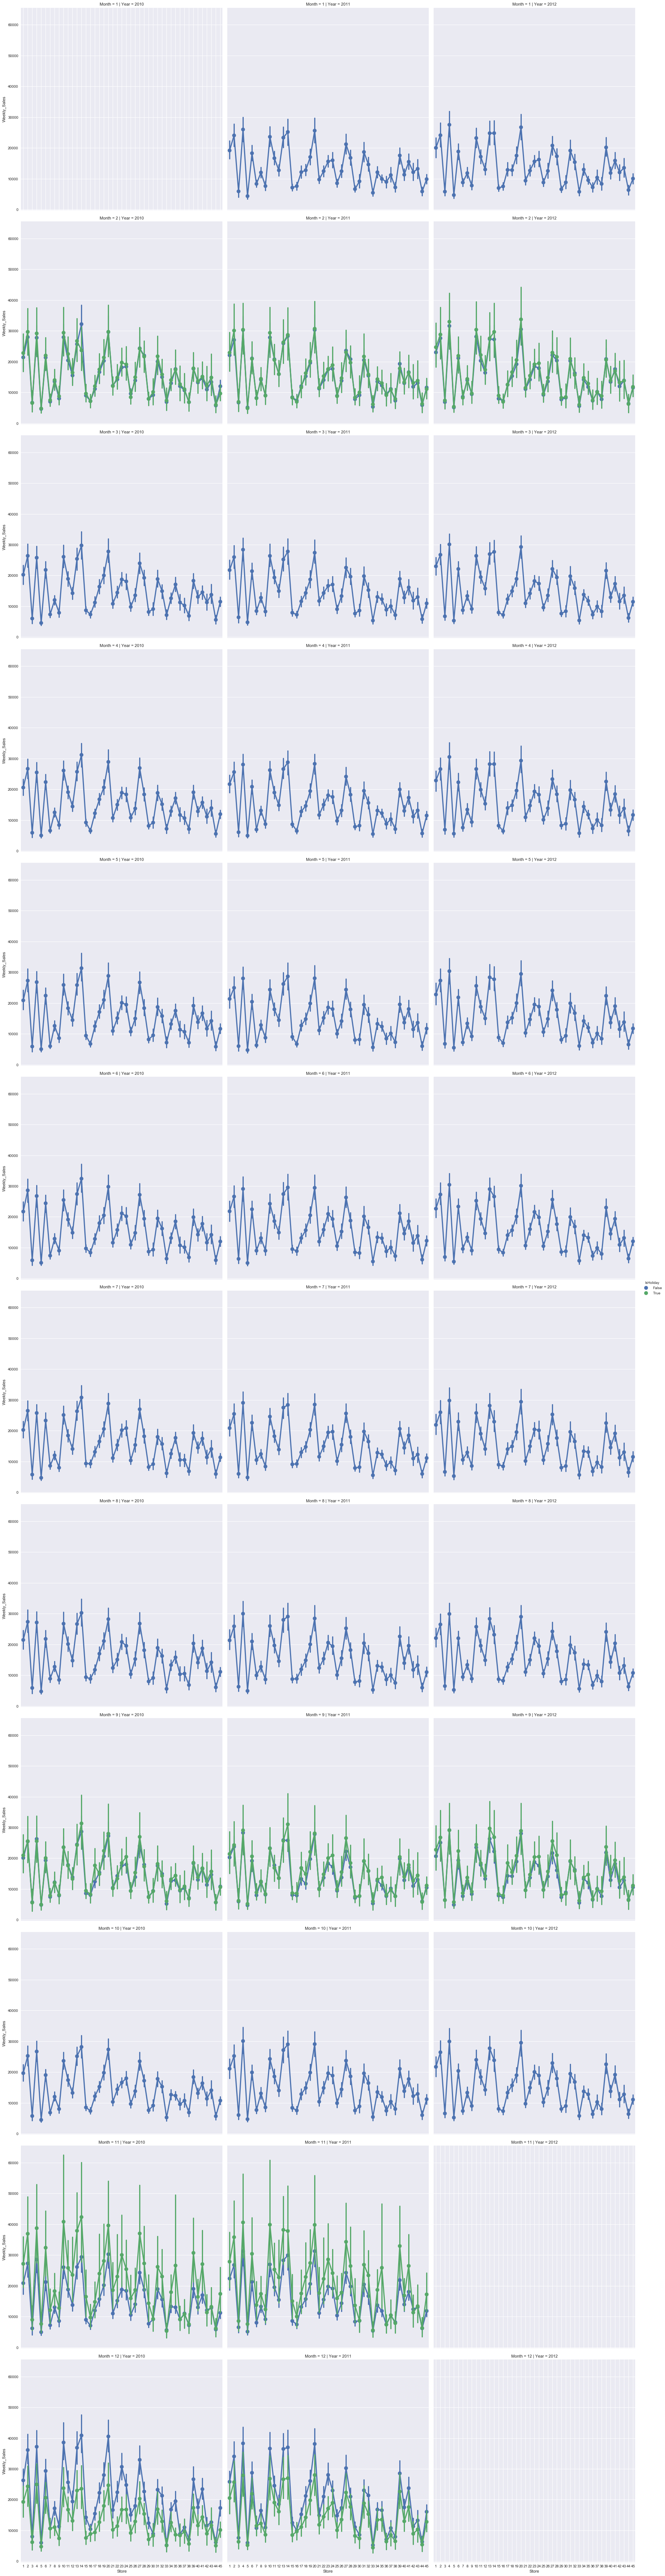

In [52]:
#Sales of Stores plotted by Year, Month with IsHoliday flag.

sns.factorplot(x='Store',y='Weekly_Sales',data=train_new,col='Year',row='Month',hue='IsHoliday',size=8)


### Observation:
### 1. The holidays are only in Feb, Sep, Nov, Dec.
### 2. The Weekly Sales of all stores have a similar distribution for the same month in the 3 years under observation, 
### meaning the graph looks alike for a given month in differnt years.

In [53]:
## Weekly Sales for all stores by year, month and temperature:

train_new['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

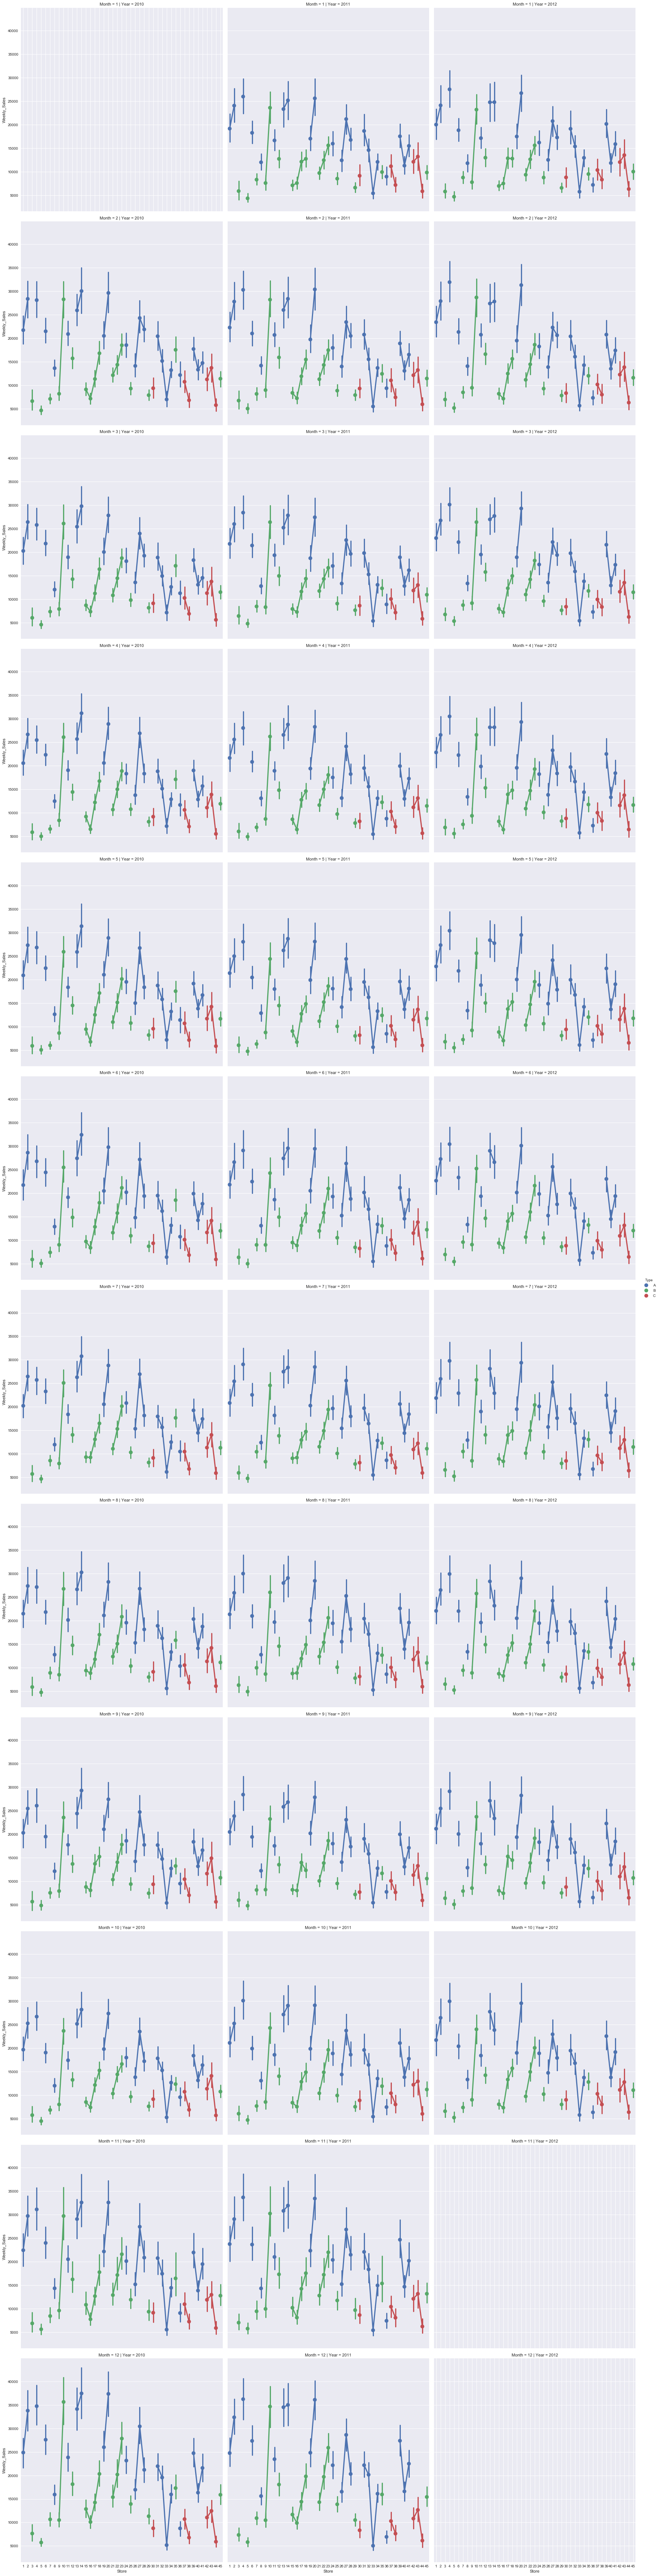

In [56]:
#Graph of all stores, by Year/Month and Type of Store:
sns.factorplot(x='Store',y='Weekly_Sales',data=train_new,col='Year',row='Month',hue='Type',size=8)